In [45]:
import re
import unicodedata
import pandas as pd
import nltk
from env import get_db_url
from acquire import get_blog_articles, get_news_articles
from prepare import prepare_df, remove_stopwords

import matplotlib.pyplot as plt

In [2]:
# getting codeup blog data
codeup_df = prepare_df(get_blog_articles(), 'content', transpose=True)

/Users/aaron/codeup-data-science/natural-language-processing-exercises/acquire.py:65: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 65 of the file /Users/aaron/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


In [3]:
# getting news articles as a df
news_df = prepare_df(get_news_articles(), 'content')

# Spam Data

### Load the spam data set.

In [5]:
# getting smap and ham df
url = get_db_url("spam_db")
query = "SELECT * FROM spam"

df = pd.read_sql(query, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [29]:
# ham_words

In [14]:
df['lemmatized'] = df.text.apply(clean).apply(' '.join)

In [15]:
df

,label,text,lemmatized
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact a750 pound prize claim ...
5568,ham,Will Ì_ b going to esplanade fr home?,i_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion


### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [30]:
def get_bigrams(text):
    '''
    
    '''
    
    bigrams = nltk.ngrams(text, 2)
    
    return bigrams

In [22]:
# ham bigrams
ham_bigrams = df[df.label == 'ham'].lemmatized.apply(get_bigrams)

# spam bigrams
spam_bigrams = df[df.label == 'spam'].lemmatized.apply(get_bigrams)

In [42]:
# geting a series of the top 20 bigrams for all strings labeled ham
top_20_ham_bigrams = pd.Series(get_bigrams(ham_words))\
.value_counts()\
.head(20)

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

<AxesSubplot:>

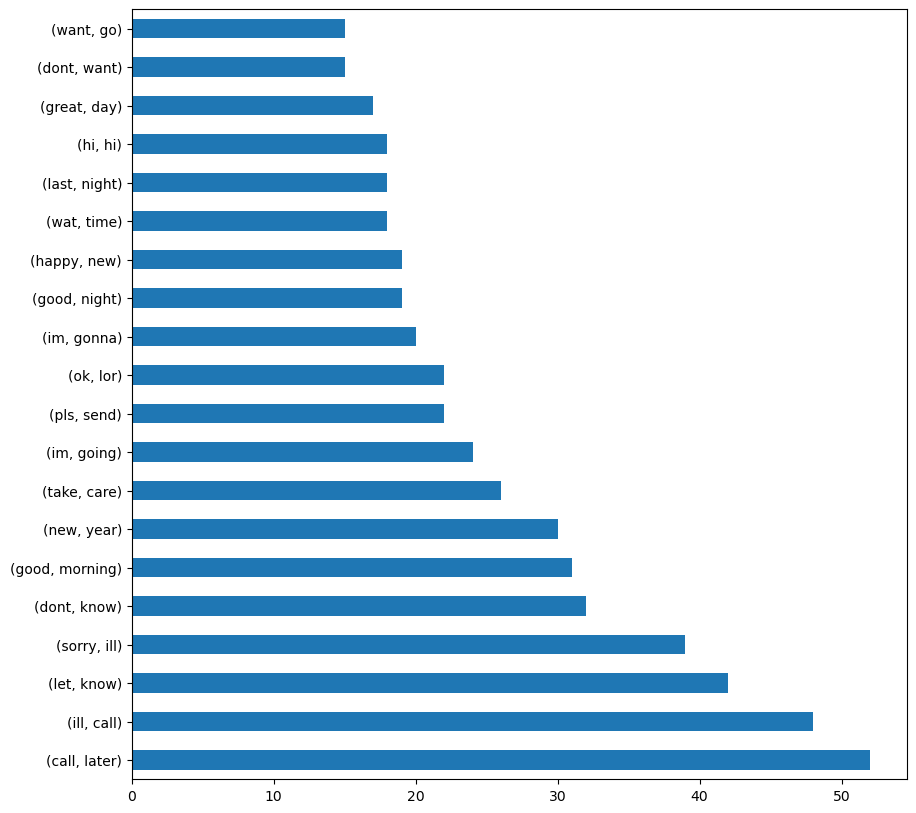

In [44]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(figsize=(10, 10))

### Is there any overlap in the bigrams for the spam data and the ham data?

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.